In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Plotten von Tabelle 1

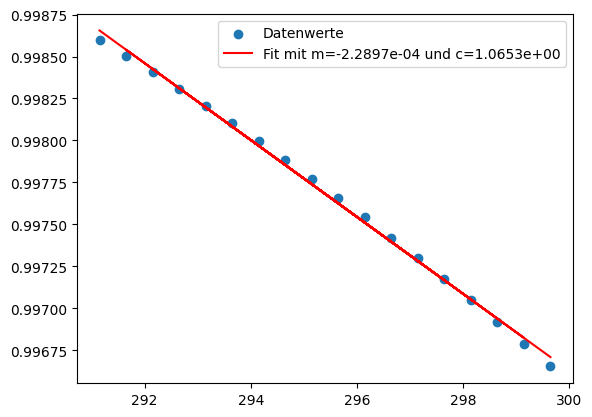

In [2]:
fig, ax = plt.subplots()

p = 0.9  # g/cm^3

tabelle_1 = '18 0,9985976 21 0,9979948 24 0,9972994 18,5 0,9985038 21,5 0,9978852 24,5 0,9971749 19 0,9984073 22 0,997773 25 0,997048 19,5 0,9983081 22,5 0,9976584 25,5 0,9969186 20 0,9982063 23 0,9975412 26 0,996787 20,5 0,9981019 23,5 0,9974215 26,5 0,996653'.replace(
    ",", ".").split(" ")
temp_druck_wasser = {}
for i in range(int(len(tabelle_1) / 2)):
    temp_druck_wasser.update({float(tabelle_1[i * 2]) + 273.15: float(tabelle_1[i * 2 + 1])})

Ts = np.array(list(temp_druck_wasser.keys()))
Ps = np.array(list(temp_druck_wasser.values()))

ax.scatter(Ts, Ps, label="Datenwerte")
params = linregress(Ts, Ps)
ax.plot(Ts, Ts * params.slope + params.intercept,
        c="red",
        label=f"Fit mit m={np.format_float_scientific(params.slope, 4)} und c={np.format_float_scientific(params.intercept, 4)}")
ax.legend()


# Plotten von Tabelle 2

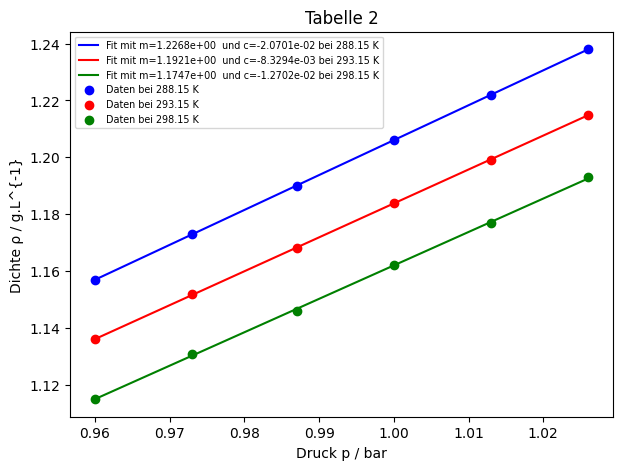

In [3]:
fig, ax = plt.subplots(figsize=(7, 5))

temp_druck_dichte_luft = [
    np.array([0.960, 0.973, 0.987, 1.000, 1.013, 1.026]),
    np.array([1.157, 1.173, 1.190, 1.206, 1.222, 1.238]),
    np.array([1.136, 1.152, 1.168, 1.184, 1.199, 1.215]),
    np.array([1.115, 1.131, 1.146, 1.162, 1.177, 1.193]),
]

Ts = [288.15, 293.15, 298.15]
colors = ["blue", "red", "green"]

params = [linregress(temp_druck_dichte_luft[0], temp_druck_dichte_luft[x + 1]) for x in range(3)]

for i in range(3):
    ax.plot(temp_druck_dichte_luft[0], temp_druck_dichte_luft[0] * params[i].slope + params[i].intercept,
            c=colors[i],
            label=f"Fit mit m={np.format_float_scientific(params[i].slope, 4)}  und c={np.format_float_scientific(params[i].intercept, 4)} bei {Ts[i]} K")

for i in range(3):
    ax.scatter(temp_druck_dichte_luft[0], temp_druck_dichte_luft[i + 1], c=colors[i], label=f"Daten bei {Ts[i]} K")

ax.set_xlabel("Druck p / bar")
ax.set_ylabel("Dichte ρ / g.L^{-1}")
ax.set_title("Tabelle 2")
ax.legend(fontsize="x-small")

# Dichte der Luft bei einer Temperatur von T = 21,2°C und bei einem Druck von p= 1,007 bar

Aus dem Diagramm ergibt sich, dass die Dichte Steigungen der Graphen von der Temperatur quasi unabhänhig sind. Die Temperatur fließt lediglich in den y-Achsenabschnitt ein. Es wird demnach der Mittelwert der Steigungen bestimmt und durch lineare Regression der y-Achsenabschnitt bestimmt

In [4]:
steigung = sum([x.slope for x in params]) / 3
c_params = linregress(Ts, [x.intercept for x in params])
c = c_params.slope * (273.15 + 21.2) + c_params.intercept
print(steigung * 1.007 + c)

1.1933082984164984


# Plotten von Tabelle 3

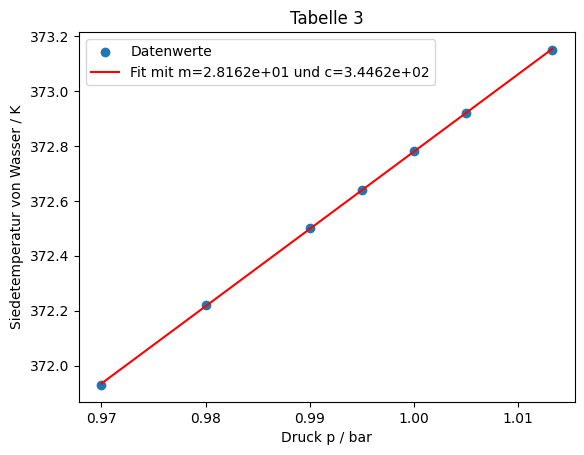

Siedetemperatur von Wasser bei 1007,1 mbar: 373.0 K


In [5]:
ps = np.array([float(x) for x in "0.970 0.980 0.990 0.995 1.000 1.005 1.01325".split(" ")])
Ts = np.array([float(x) for x in "98.78 99.07 99.35 99.49 99.63 99.77 100".split(" ")]) + 273.15

fig, ax = plt.subplots()

ax.scatter(ps, Ts, label="Datenwerte")
params = linregress(ps, Ts)
ax.plot(ps, ps * params.slope + params.intercept,
        c="red",
        label=f"Fit mit m={np.format_float_scientific(params.slope, 4)} und c={np.format_float_scientific(params.intercept, 4)}")
ax.legend()
ax.set_xlabel("Druck p / bar")
ax.set_ylabel("Siedetemperatur von Wasser / K")
ax.set_title("Tabelle 3")
plt.show()
print(f"Siedetemperatur von Wasser bei 1007,1 mbar: {round(params.slope * 1007.1e-3 + params.intercept, 1)} K")

# Mindestvolumen Ester

In [6]:
dichte_ester = 0.9e3  #g/L
T = 100 + 273.15 # K (Temperatur im Wasserbad)
V = 0.28e-3 # m³
p = 101325  # Pa (1 atm)
R = 8.3145
molare_masse = 12.011 * 4 + 2 * 15.999 + 8 * 1.008
n_Kolben = (p * V) / (R * T)

masse_ester = molare_masse * n_Kolben
volumen_ester = masse_ester / dichte_ester
print(f"Mindestvolumen: {np.format_float_scientific(volumen_ester, 4)} L")


Mindestvolumen: 8.952e-04 L
